# Preliminaries
We will be analyzing at some of the simplest possile fluorescence data in this lecture. Fluorescence microscopy has enabled the observation of single molecules in action, generally *in vitro*. Because each object is literally a point-like source, one can expect the image of each molecule to appear as a PSF in the image. 

Have you come across single molecule studies? <br>
What types of information could one obtain by observing single molecules?

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread

# Quantification of fluorescence emitted by single molecules
Load the file using the url below. This file contains a fluorescent object (it's actually a DNA origami scaffold that we tried to use to study the collective behavior of some proteins) adhered to the slide so it doesn't move. The file is a time-lapse image stack covering 300 s.

Use Fiji/ImageJ to get familiar with the image stack.

**Questions:**
1. Can you recollect the various components/layers that add up to make an electronic image?
2. How does this knowledge guide you in quantifying the fluorescence signal?

In [57]:
# Load one of the following three files
img = imread('https://raw.githubusercontent.com/ajitpj/IISER_2023/main/Images/L3/File1_Cy3_mini.tif')

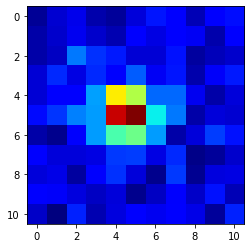

In [58]:
plt.imshow(img[1,:,:], cmap='jet')


## Demonstration: Plot how the mean value of the image changes over time.

# Exercise (10 min): (1) Plot changes in the average background intensity and the average signal intensity over time. (2) Create a histogram of the signal and background intensities.

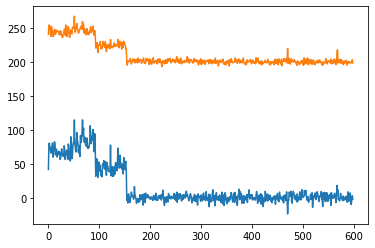

In [31]:
nPlanes = img.shape[0]
bkg_values = []
sig_values = []
mean_values = []

for i in np.arange(0, nPlanes-1):
  im = img[i,:,:].copy()
  mean_values.append(np.mean(im.flatten()))
  bkg = im.copy()
  bkg[2:9,2:9] = 0
  bkg_values.append(np.mean(bkg[bkg>0]))
  sig_values.append(np.mean(im[2:9,2:9].flatten()))

plt.plot(np.array(sig_values) - np.array(bkg_values))
plt.plot(mean_values)
# plt.imshow(bkg)

# Demonstration: Using the skimage library to automate analysis

[peak_local_max](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.peak_local_max) - This algorithm finds the 'local' maximum in the image using some definitions of both "local" and "maximum". 

In [34]:
from skimage.feature import peak_local_max
img = imread('https://raw.githubusercontent.com/ajitpj/IISER_2023/main/Images/L3/File1_Cy3.tif')

In [55]:
first_im = img[0,:,:]
b = peak_local_max(first_im, 2, threshold_rel=0.15)

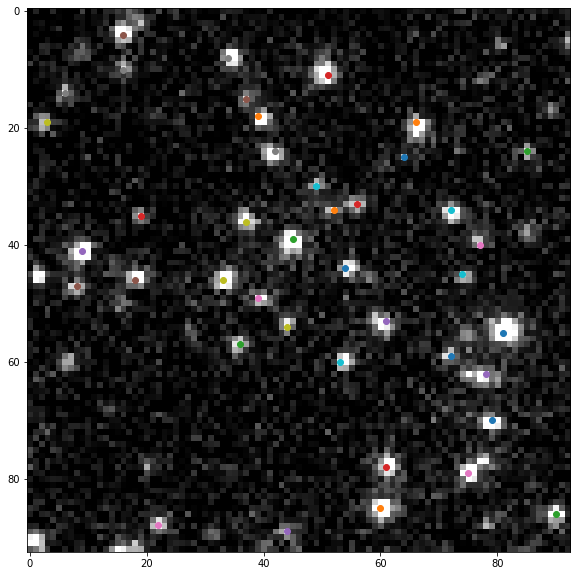

In [56]:
f, a = plt.subplots(figsize=(10,10))
a.imshow(first_im, vmax=500, vmin=200, cmap='gray')
npoints = len(b)
for i in np.arange(npoints):
  plt.plot(b[i,1],b[i,0], 'o')

In [59]:
np.indices(img.shape)

array([[[[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],

        [[  1,   1,   1, ...,   1,   1,   1],
         [  1,   1,   1, ...,   1,   1,   1],
         [  1,   1,   1, ...,   1,   1,   1],
         ...,
         [  1,   1,   1, ...,   1,   1,   1],
         [  1,   1,   1, ...,   1,   1,   1],
         [  1,   1,   1, ...,   1,   1,   1]],

        [[  2,   2,   2, ...,   2,   2,   2],
         [  2,   2,   2, ...,   2,   2,   2],
         [  2,   2,   2, ...,   2,   2,   2],
         ...,
         [  2,   2,   2, ...,   2,   2,   2],
         [  2,   2,   2, ...,   2,   2,   2],
         [  2,   2,   2, ...,   2,   2,   2]],

        ...,

        [[597, 597, 597, ..., 597, 597, 597],
         [597, 597, 597, ..., 597, 597, 597],
         [597, 597